# Package installation

In [ ]:
# !pip install tensorflow
# !pip install opencv-python
# !pip3 install --upgrade tensorflow

In [4]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [6]:
import cv2
import imghdr

# Removing unwanted extensions

In [7]:
data_dir = 'Cars'
correct_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
!pwd

/c/Users/emiel/OneDrive/Personal projects/Machine Learning/car-recognition-ML


In [29]:
# for brand in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, brand)):
#         image_path = os.path.join(data_dir, brand, image)
#         try:
#             img = cv2.imread(image_path)
#             img_ext = imghdr.what(image_path)
#             if img_ext not in correct_ext:
#                 print(f'Image does not have the correct extension: {image_path}')
#                 os.remove(image_path)
#         except Exception as e:
#             print(e)
#             print(f"Issue with image {image_path}")

# Rescaling and splitting the data

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
# setup general info on batch sizes and img sizes
batch_size = 32
img_height = 256
img_width = 256

In [32]:
# generate training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Cars",
    validation_split= 0.2, # let the program know what the validation split will be in order to choose the correct size of this training set as well
    subset="training", # here we denote that this set will be the *training* set.
    seed=123,
    image_size = (img_height, img_width), # rescale images automatically
    batch_size= batch_size
) 

Found 3697 files belonging to 5 classes.
Using 2958 files for training.


In [33]:
# generate validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    "Cars",
    validation_split= 0.2,
    subset="validation", # here we denote that this set will be the *validation* set.
    seed=123, 
    image_size = (img_height, img_width),
    batch_size= batch_size
)

Found 3697 files belonging to 5 classes.
Using 739 files for validation.


In [34]:
# automatic labelling with this object, based on dict names.
class_names = train_ds.class_names

2023-08-06 19:57:53.683472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


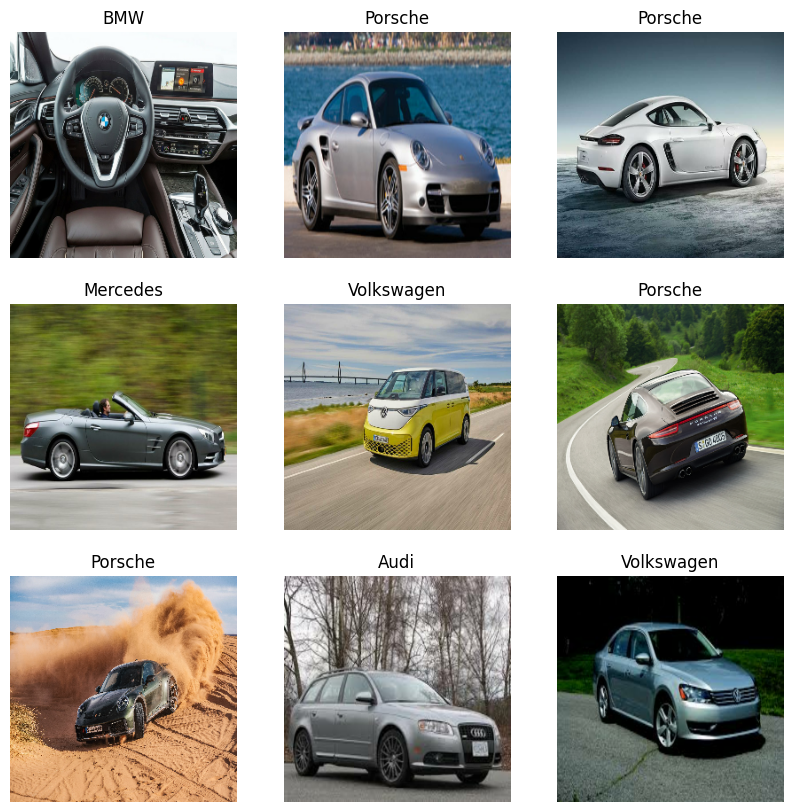

In [35]:
# Visualisation of the images to check the labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [36]:
# taken from tf tutorial, unknown what this does so far
AUTOTUNE = tf.data.AUTOTUNE

# randomly shuffle your data.
train_ds_pref = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# function of this line is currently unknown.
val_ds_pref = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
# normalize the data to be limited between 0 and 1 values.
normalization_layer = tf.keras.layers.Rescaling(1./255) # specify what you want to do as normalisation (this is essentially defining a function)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # actual normalisation of the data

In [38]:
# # check that normalisation worked
# image_batch, labels_batch = normalized_ds.as_numpy_iterator().next()
# print(np.min(image_batch[0]), np.max(image_batch[0]))

# Creating the model

In [39]:
num_classes = len(class_names)

# initialise the model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
# compile the model
model.compile(optimizer='adam', # choose the optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function is same as error function
              metrics=['accuracy']) # choose which metrics to keep track of during optimization

In [41]:
# provide overview of the model dataflow
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [42]:
# train model using initial datasets.
# epochs=10
# history = model.fit(
#   train_ds_pref,
#   validation_data=val_ds_pref,
#   epochs=epochs
# )

Epoch 1/10


2023-08-06 19:57:59.415416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-06 19:58:08.421557: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 39 of 1000
2023-08-06 19:58:15.320408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-06 19:58:18.443210: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 82 of 1000
2023-08-06 19:58:19.081054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


93/93 [==============================] - 97s 807ms/step - loss: 1.7573 - accuracy: 0.2725 - val_loss: 1.5731 - val_accuracy: 0.2909
Epoch 2/10
93/93 [==============================] - 63s 677ms/step - loss: 1.4956 - accuracy: 0.3499 - val_loss: 1.5100 - val_accuracy: 0.3464
Epoch 3/10
93/93 [==============================] - 63s 683ms/step - loss: 1.1369 - accuracy: 0.5578 - val_loss: 1.3661 - val_accuracy: 0.4790
Epoch 4/10
93/93 [==============================] - 67s 719ms/step - loss: 0.5744 - accuracy: 0.7982 - val_loss: 1.4362 - val_accuracy: 0.5562
Epoch 5/10
93/93 [==============================] - 69s 741ms/step - loss: 0.1886 - accuracy: 0.9442 - val_loss: 2.1257 - val_accuracy: 0.5900
Epoch 6/10
93/93 [==============================] - 64s 690ms/step - loss: 0.0992 - accuracy: 0.9814 - val_loss: 2.1809 - val_accuracy: 0.6184
Epoch 7/10
93/93 [==============================] - 65s 695ms/step - loss: 0.0272 - accuracy: 0.9973 - val_loss: 2.7767 - val_accuracy: 0.5981
Epoch 8/10

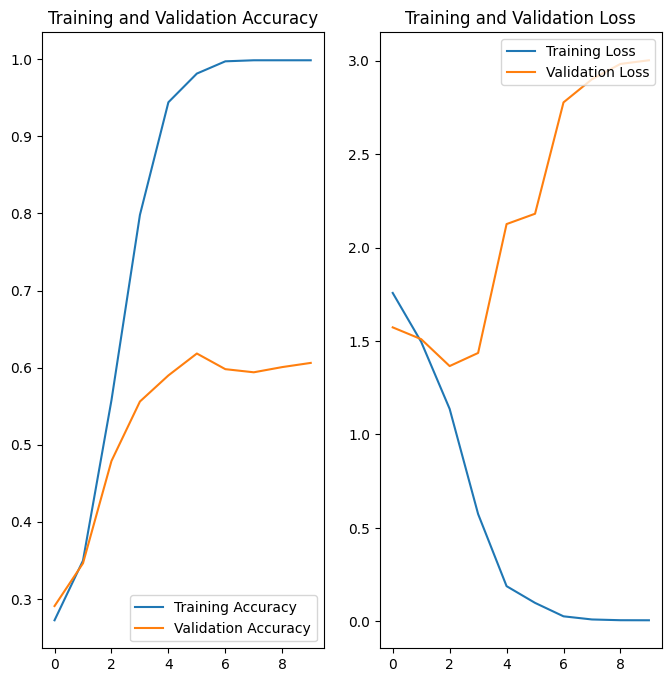

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Just as in the [image classification tutorial form TensorFlow](https://www.tensorflow.org/tutorials/images/classification#overfitting), our validation accuracy seems to stall at about 60%, and our validation error increases with the training, a classic sign of overfitting. In order to combat this issue, we will perform data augmentation in the next iteration of this project.